In [141]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [170]:
# Load the train CSV file
train = pd.read_csv('/content/train.csv', header=None, on_bad_lines='skip')

<ipython-input-170-b2eb4c02e71b>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [143]:
train.shape

(40850, 785)

In [144]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
train.shape

(40850, 785)

In [171]:
train.isnull().any().sum()

483

In [172]:
train.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
780,3
781,3
782,3
783,3


In [174]:
# Count the number of null values in each row
null_counts_per_row = train.isnull().sum(axis=1)

In [175]:
# Count how many rows have at least one null value
rows_with_nulls = (null_counts_per_row > 0).sum()

In [176]:
rows_with_nulls

3

In [179]:
train = train.dropna()

In [180]:
train.shape

(40847, 785)

In [181]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
train.isnull().any().sum()

0

In [183]:
y_train = train.iloc[1:, 0]
x_train = train.iloc[1:, 1:]


In [184]:
y_train.head()

,0
1,1
2,0
3,1
4,4
5,0


In [185]:
x_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
y_train = train.iloc[1:, 0].values
x_train = train.iloc[1:, 1:].values

In [187]:
x_train.shape

(40846, 784)

In [190]:
# Reshape to (40849, 28, 28, 1)
x_train = x_train.reshape((40846, 28, 28, 1))


In [191]:
x_train.shape

(40846, 28, 28, 1)

In [192]:
x_train = x_train.astype('float32') / 255.0

In [193]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

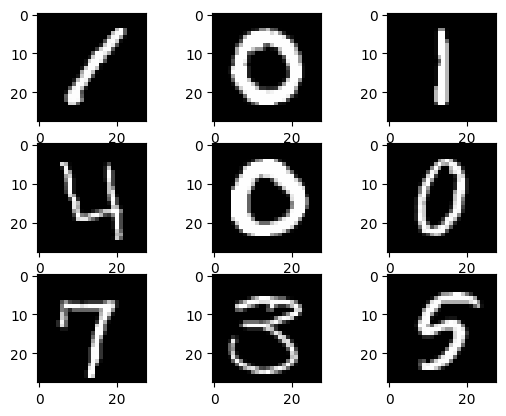

In [194]:
# Display the first 9 images from the training set
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i],cmap='gray')
plt.show()



In [195]:
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels

In [196]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [198]:
y_train.shape

(40846, 10)

In [199]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [200]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [201]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.8224 - loss: 0.6053 - val_accuracy: 0.9778 - val_loss: 0.0751
Epoch 2/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 38s 74ms/step - accuracy: 0.9763 - loss: 0.0728 - val_accuracy: 0.9818 - val_loss: 0.0560
Epoch 3/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.9873 - loss: 0.0445 - val_accuracy: 0.9853 - val_loss: 0.0469
Epoch 4/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.9887 - loss: 0.0364 - val_accuracy: 0.9832 - val_loss: 0.0545
Epoch 5/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9834 - val_loss: 0.0491
Epoch 6/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9871 - val_loss: 0.0463
Epoch 7/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.9936 - loss: 0.0187 - val_accuracy: 0.9857 - val_loss: 0.0518
Epoch 8/10
511/511 ━━━━━━━━━━━━━━━━━━━━ 34s 67ms/step - accuracy: 0.9944 - loss: 0.0155 - 

In [211]:
# Save the model
model.save('Digi_Recognizer.h5')

# # Load the model
# loaded_model = load_model('MNIST_Digit_Classification.h5')

In [202]:
test = pd.read_csv('/content/test.csv')

In [203]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
test.shape

(28000, 784)

In [205]:
test = test.values

In [206]:
# Reshape to (40849, 28, 28, 1)
test = test.reshape((28000, 28, 28, 1))

test = test.astype('float32') / 255.0

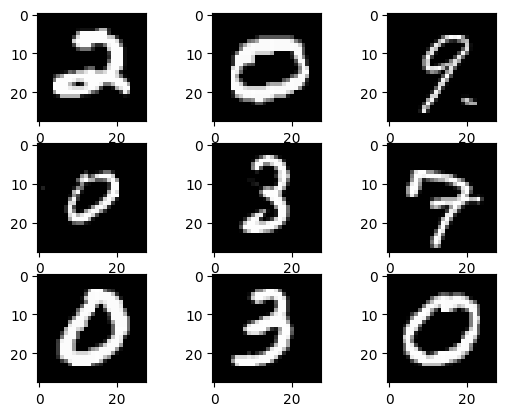

In [207]:
# Display the first 9 images from the training set
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(test[i],cmap='gray')
plt.show()

In [208]:
# Make predictions
predictions = model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step


In [209]:
# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

In [210]:
predicted_classes

array([2, 0, 9, ..., 3, 9, 2])

In [212]:
# Create an ImageId column
image_ids = np.arange(1, len(predictions) + 1)

In [218]:
len(image_ids)

28000

In [219]:
len(predicted_classes)

28000

In [223]:
# Ensure both arrays are 1-dimensional
image_ids = image_ids.ravel()
predictions = predicted_classes.ravel()

In [224]:
# Check lengths
if len(image_ids) != len(predicted_classes):
    raise ValueError("The lengths of image_ids and predictions must be the same.")

In [225]:
# Create a DataFrame
results_df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': predictions
})

In [226]:
# Save the DataFrame to a CSV file
results_df.to_csv('predictions.csv', index=False)